 # GEO Data Processing

![](./images/Module1/Data_Processing.jpg)

## Learning Objectives:
1. Understand the type of data that is accessible from GEO.
2. Demonstrate how to navigate the GEO website, search for datasets using accession number, and select samples.
3. Use command-line to download data from GEO.
4. Perform data pre-processing, normalization, loading and saving the expression matrix.

## Accessing Public GEO Sequencing Data
The Gene Expression Omnibus (GEO) is a public repository that archives and freely distributes comprehensive sets of microarray, next-generation sequencing, and other forms of high-throughput functional genomic data submitted by the scientific community. In addition to data storage, the website provides set of web-based tools and applications to help users query and download the studies and gene expression patterns stored in GEO.
### Searching and accessing data on GEO
Searching for GEO is relatively straightforward. First, users need to navigate to
<a href="https://www.ncbi.nlm.nih.gov/geo/"> https://www.ncbi.nlm.nih.gov/geo/</a>.
There are multiple ways to search for datasets but the simplest way is to provide the accession number in the search box. We will use an example dataset with the accession number
<a href="https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE48350">GSE48350</a> for demonstration.
The GEO website interface with the searching procedure of the example dataset is shown in the figure below:

![](./images/Module1/GEO_Website.png)

When the searching process is done, a webpage with a detailed record of the example dataset such as published date, title, organism, experiment type, dataset summary, etc. will be shown in the figure below:

![](./images/Module1/GEO_Dataset_Page.png)

We can see that the dataset GSE48350 was published on Apr 21, 2014, which focuses on Human Alzheimer's
Disease using microarray sequencing technology. Samples were primarily collected from 4 brain regions:
hippocampus (HC), entorhinal cortex (EC), superior frontal cortex (SCG), and post-central gyrus (PCG) of normal and disease patients.

To display the quiz in all the learning sub-modules, it is necessary to have the `IRdisplay` package pre-installed.
This package allows quizzes written in `html` format to show up in the notebook. Users can install the `IRdisplay` using the following command:
```
suppressWarnings(if (!require("IRdisplay")) install.packages("IRdisplay"))
suppressWarnings(library(IRdisplay))
```


In [1]:
# Run the following command to take the quiz
IRdisplay::display_html('<iframe src="./Quizzes/Quiz_Submodule1.html" width=100% height=250></iframe>')

## Downloading Data Using Web-interface
At the bottom of the dataset page, users will find additional information about the dataset such as sequencing platform, number of samples, project ID, and links to download the expression data.
The exact places to find this information are shown in the figure below:

![](./images/Module1/Manual_Download.png)

The dataset GSE48350 was sequenced using Affymetrix Human Genome U133 Plus 2.0 Array and the whole dataset contains 253 samples. The summary table at the bottom of the page shows all the data generated from the experiment. Users can click the "(http)" hyperlink to download all the samples or click "(custom)" to select and download the samples of interest. Note that, expression data downloaded at this step is raw data and additional data processing needs to be done locally for further analysis.

## Accessing GEO Data Using R Command Line
### Downloading and pre-processing the data

Getting data from GEO is quite easy using <a href="https://bioconductor.org/packages/release/bioc/html/GEOquery.html">GEOquery</a> R package available in <a href="https://bioconductor.org/">Bioconductor</a>. Before starting, users will need to install the GEOquery package using the following command.

In [9]:
suppressMessages({
    
    if (!require("BiocManager", quietly = TRUE)) {
        suppressWarnings(install.packages("BiocManager"))

    }  
    suppressWarnings(BiocManager::install("GEOquery", update = F))
})

We can use the `getGEO` function from the `GEOquery` package to download GEO dataset. First, users have to specify the accession ID of the dataset. For this demonstration, we will use the same dataset `GSE48350`..

In [10]:
suppressMessages(library("GEOquery"))
## change accession_ID to be the dataset that you want.
accession_ID <- "GSE48350"
suppressMessages({
    gse <- getGEO(GEO = accession_ID, GSEMatrix = TRUE, AnnotGPL = TRUE)
})

To use the `getGEO` function, you need to pass the following arguments:

- `GEO`: A string ID representing a GEO dataset for download and parsing. (eg., 'GDS505','GSE2','GSM2','GPL96')
- `GSEMatrix`: A boolean telling GEOquery whether or not to use GSE Series Matrix files from GEO. The parsing of these files can be many orders-of-magnitude faster than parsing the GSE SOFT format files. Defaults to TRUE, meaning that the SOFT format parsing will not occur; set to FALSE if you for some reason need other columns from the GSE records.
- `AnnotGPL`: A boolean defaulting to FALSE as to whether or not to use the Annotation GPL information. These files contain up-to-date information remapped from Entrez Gene on a regular basis. However, they do not exist for all GPLs; in general, they are only available for GPLs referenced by a GDS.

The `getGEO` function will return an object of the appropriate class (GDS, GPL, GSM, or GSE) contains the GEO dataset.

Some datasets on GEO may be derived from different microarray platforms. Therefore, the object `gse` can be a list of different datasets.
You can find out how many platforms were used by checking the length of the `gse` object.

In [3]:
## check how many platforms used
if (length(gse) > 1) idx <- grep("GPL570", attr(gse, "names")) else idx <- 1
data <- gse[[idx]]
print(paste0("Number of platforms: ", length(data)))

[1] "Number of platforms: 1"


The result shows that we have only one dataset that belongs to the microarray platform mentioned GEO dataset page.
Next, we can access the samples information and genes using the command below:

In [4]:
# Get the samples information
samples <- pData(data)
# Get the genes information
genes <- fData(data)
# Check the number of samples and genes
print(paste0("The dataset contains ", dim(samples)[1] , " samples and ", dim(genes)[1], " genes"))

[1] "The dataset contains 253 samples and 54675 genes"


In [8]:
# Run the following command to take the quiz
IRdisplay::display_html('<iframe src="./Quizzes/Quiz_Submodule1-1.html" width=100% height=250></iframe>')

The ```samples``` contains the metadata of each sample such as title, status, GEO accession, submission data, etc. While the ```genes```
dataframe shows us the probeID, title, gene symbol, gene ID, and many more. We can inspect the detail of the first several rows and columns
of ```samples``` and ```genes``` dataframe using the following command:

In [7]:
# Show the first several rows and columns of samples
samples[1:5, 1:4]
# Show the first several rows and columns of genes
genes[1:5, 1:5]

,title,geo_accession,status,submission_date
,<chr>,<chr>,<chr>,<chr>
GSM300166,PostcentralGyrus_female_91yrs_indiv10,GSM300166,Public on Oct 09 2008,Jun 25 2008
GSM300167,SuperiorFrontalGyrus_female_91yrs_indiv10,GSM300167,Public on Oct 09 2008,Jun 25 2008
GSM300168,Hippocampus_female_96yrs_indiv105,GSM300168,Public on Oct 09 2008,Jun 25 2008
GSM300169,Hippocampus_male_82yrs_indiv106,GSM300169,Public on Oct 09 2008,Jun 25 2008
GSM300170,Hippocampus_male_84yrs_indiv108,GSM300170,Public on Oct 09 2008,Jun 25 2008


,ID,Gene title,Gene symbol,Gene ID,UniGene title
,<chr>,<chr>,<chr>,<chr>,<chr>
1007_s_at,1007_s_at,microRNA 4640///discoidin domain receptor tyrosine kinase 1,MIR4640///DDR1,100616237///780,
1053_at,1053_at,replication factor C subunit 2,RFC2,5982,
117_at,117_at,heat shock protein family A (Hsp70) member 6,HSPA6,3310,
121_at,121_at,paired box 8,PAX8,7849,
1255_g_at,1255_g_at,guanylate cyclase activator 1A,GUCA1A,2978,


To inspect the expression data of the first few rows and samples, we can use this command:

In [8]:
# Show the first few rows of the expression data
head(exprs(data)[, 1:5])

,GSM300166,GSM300167,GSM300168,GSM300169,GSM300170
1007_s_at,0.8880162,1.4355185,1.6096015,1.754960,1.820730
1053_at,0.6664604,0.8858521,1.8590777,1.036666,1.421393
117_at,0.8596384,1.0620298,3.0973945,2.243655,5.060301
121_at,0.9751495,1.0507448,0.9822838,1.198237,1.039529
1255_g_at,0.4912547,0.5375254,3.1796446,1.514290,2.185801
1294_at,0.8344268,0.9291890,1.5193694,1.557089,1.641263


The `summary` function can then be used to print the distributions of each sample and
the `range` function can help to check for the expression value range.

In [11]:
# Show a summary of the expression data using the summary function
summary(exprs(data)[, 1:5])
# Show value range of the expression data using the range function
range(exprs(data))

   GSM300166          GSM300167          GSM300168         GSM300169       
 Min.   :  0.0100   Min.   :  0.0100   Min.   : 0.0100   Min.   : 0.01942  
 1st Qu.:  0.6366   1st Qu.:  0.6519   1st Qu.: 0.3342   1st Qu.: 0.32045  
 Median :  0.8622   Median :  0.8828   Median : 0.7756   Median : 0.75063  
 Mean   :  0.9193   Mean   :  0.9492   Mean   : 0.9274   Mean   : 0.87928  
 3rd Qu.:  1.0903   3rd Qu.:  1.0880   3rd Qu.: 1.1929   3rd Qu.: 1.15987  
 Max.   :335.6746   Max.   :531.7116   Max.   :99.4657   Max.   :26.46015  
   GSM300170       
 Min.   : 0.01098  
 1st Qu.: 0.32324  
 Median : 0.77234  
 Mean   : 0.93768  
 3rd Qu.: 1.21978  
 Max.   :83.41583  

[1]    0.010 1438.763

From the summary of the data above, we can clearly see that the maximum expression values can be in the scale of thousands, while the average expression values in each sample are below one. Therefore, pre-processing and normalization are required for quality assurance. One common step is to perform quartile filtering to remove the outlier and missing expression values. Also, we will need to perform a $log_2$ transformation to ensure the distributions of all samples are similar. Then, a `boxplot` can also be generated to see if the data have been correctly normalized. We can use the sample code below to perform all of those steps.

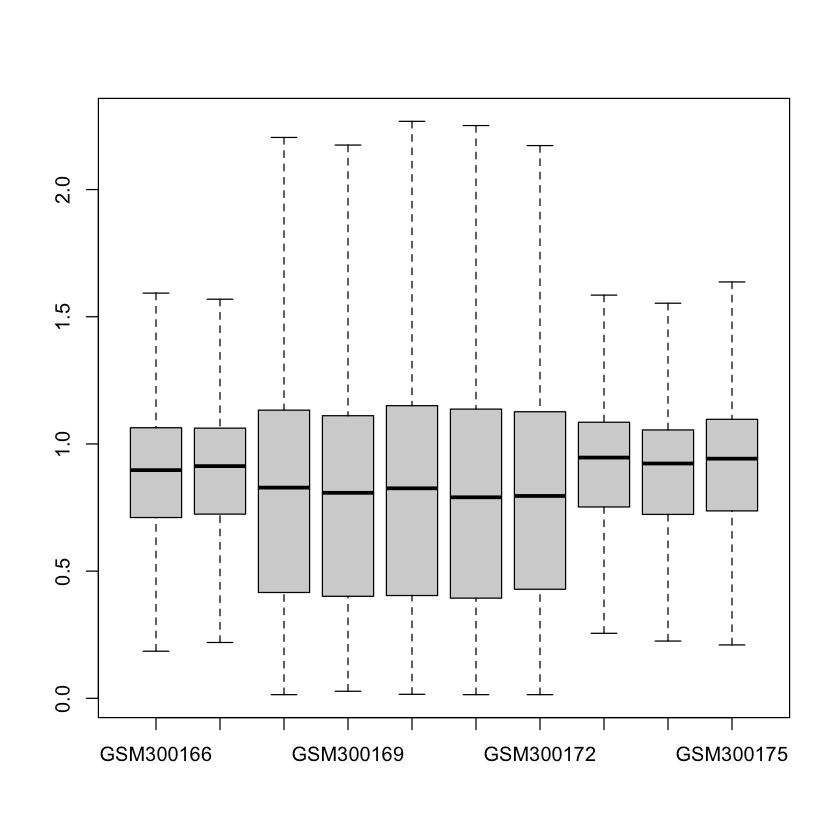

In [12]:
# Get expression matrix
expression_data <- exprs(data)
# Calculate the data quantile and remove the NA value
qx <- as.numeric(quantile(expression_data, c(0., 0.25, 0.5, 0.75, 0.99, 1.0), na.rm = T))
# Define LogC variable (boolean) to decide whether or not to perform the log transformation
# If 99% of the data > 100 or (range > 50 and 25% of the data > 0), LogC = True and perform log transformation
LogC <- (qx[5] > 100) ||
    (qx[6]-qx[1] > 50 && qx[2] > 0)
# Replace negative values with NA and perform log transformation if logC is True
if (LogC) {
    expression_data[which(expression_data <= 0)] <- NaN #
    norm_expression_data <- log2(expression_data+1)
}
# Plot the boxplot of 10 samples
boxplot(x = norm_expression_data[, 1:10], outline = FALSE)

In [13]:
# Run the following command to take the quiz
IRdisplay::display_html('<iframe src="./Quizzes/Quiz_Submodule1-2.html" width=100% height=250></iframe>')

### Samples Selection
In this learning course, we focus on analyzing two groups: *disease* and *control* from the *entorhinal cortex* region of the ```GSE48350``` dataset . Therefore, we need to select the samples
that belong to *entorhinal cortex* region and form a group that has two classes. To select the samples that belong to the *entorhinal cortex*, we can use the following command:

In [14]:
# Select samples from the Entorhinal Cortex region
idx <- grep("entorhinal", samples[["brain region:ch1"]])
samples = samples[idx, ]
# Get expression and normalized expression data for samples collected from the entorhinal cortex region
expression_data = expression_data[, idx]
norm_expression_data = norm_expression_data[, idx]

To check how many samples belong to the *entorhinal cortex* region, we can use the following command:

In [15]:
# Print out the new number of genes and samples
print(paste0("#Genes: ", dim(norm_expression_data)[1], " - #Samples: ", dim(norm_expression_data)[2]))

[1] "#Genes: 54675 - #Samples: 54"


## Exporting the Data
When we have successfully retrieved expression data from GEO, we can export the expression data to a `.csv` file format for inspection in other software such as Excel using the `write_csv` function from `readr` package.
In the code below, we will save the raw expression matrix, normalized expression matrix, and grouping information to  `.csv` files.

In [16]:
# Convert raw and normalized expression matrix to data frames and save them to csv files
expression_data <- as.data.frame(expression_data)
norm_expression_data <- as.data.frame(norm_expression_data)

# Create a sub-directory data folder to save the expression matrix if it is not available
dir <- getwd()
subDir <- "/data"
path <- paste0(dir, subDir)
# check if the saving folder exists
if (!file.exists(path)){
    dir.create(file.path(path))
}
# Save expression values and group to the csv files format in the local folder
write.csv(expression_data, file = "./data/raw_GSE48350.csv")
write.csv(norm_expression_data, file = "./data/normalized_GSE48350.csv")
write.csv(samples, file = "./data/samples_GSE48350.csv")
write.csv(genes, file = "./data/genes_GSE48350.csv")

The `.csv` format is a very simple format that might not suitable to store big datasets.
We can export the expression data to `.rds` format, which is more memory efficient for loading and saving the data.
We can save all the relevant data in a `list` and write to the disk using the built in `saveRDS` function.

In [17]:
# Putting raw data, normalized data, and groups into a list
dat <- list(expression_data = expression_data, norm_expression_data = norm_expression_data, 
            samples = samples, genes = genes)
# Save the data to the local disk using rds format
saveRDS(dat, file = "./data/GSE48350.rds")

## Storing files in a Google Cloud Bucket

To run gsutil commands, the user can either create a code cell within the Jupyter notebook by clicking the + button at the top or 
click on File -> New -> Terminal to open the terminal 
 
 
To create buckets in R, it is best to use the `system` command that allows you to run bash commands in R.

In [18]:
# # Set our bucket name, remember it needs to be unique
# # Replace <BUCKET_NAME> with the name of your bucket
# system('gsutil mb gs://<BUCKET_NAME>', intern = TRUE)

The command to copy data from the local disk to the Google Cloud Bucket is as follows:

`gsutil cp PATH_TO_LOCAL_FOLDER gs://PATH_IN_GOOGLE_BUCKET`

For example, if we want to copy the file `./data/GSE48350.rds` we can use the following command.

In [19]:
# # Replace <BUCKET_NAME> with name of your bucket that was perviously made
# system("gsutil cp ./data/GSE48350.rds gs://<BUCKET_NAME>", intern = TRUE)

## Gene ID Mapping

![](./images/Module1/Gene_ID_Conversion.jpg)
## Learning Objectives:
1. Understand different probe set ID.
2. Map probe IDs into gene identifiers and symbols.

## Understanding Different Probe Set ID

Gene set or pathway analysis requires that gene sets and expression data use the same type of gene ID
(Entrez Gene ID, Gene symbol or probe set ID, etc). However, this is frequently not true for the data we have.
For example, our gene sets mostly use gene Symbols, but microarray datasets are frequently labeled by probe
set ID (or RefSeq transcript ID, etc.). Therefore, we need to map the probe set IDs to the gene Symbols.
Here, we will use the `GSE48350` dataset that we have used in the previous section for demonstration of gene ID mapping.
To know what kind of probe set ID, we need to navigate to the GEO record page of `GSE48350`. Under the `Platform`
tab, we can find the probe ID information.

![probID](./images/Module1/ProbeID.png)

From the record page, we know that the dataset was generated from 1 platform using the Affymetrix Human Genome U133 Plus 2.0 Array.
To convert or map the probe set IDs to gene symbols, we need to find the corresponding annotation package from
<a href="https://bioconductor.org/">Bioconductor</a>. For analyzed data, we need to use the `hgu133plus2.db` and `AnnotationDbi` databases.
We can install the package using the following R command:

In [20]:
suppressMessages({
    if (!require("BiocManager", quietly = TRUE)) {
        suppressWarnings(install.packages("BiocManager"))  
    }
    suppressWarnings(BiocManager::install("hgu133plus2.db", update = F))
    suppressWarnings(BiocManager::install("AnnotationDbi", update = F))
})


  There is a binary version available but the source version is later:
         binary    source needs_compilation
RCurl 1.98-1.13 1.98-1.14              TRUE


The downloaded binary packages are in
	/var/folders/lz/5chptxdx2yg5vvszdt29pt400000gn/T//RtmpcdsEwd/downloaded_packages


In the data processing section, we successfully downloaded the dataset `GSE48350` and saved it to the `data` sub-directory.
Now we can load the dataset and check for the Probe Set ID names by using the following command.

In [21]:
# Load the previously saved dataset and get the expression data
data = readRDS("./data/GSE48350.rds")
expression_data = data$expression_data
# Get all the probe IDs and print out the first few one
probeIDs = rownames(expression_data)
head(probeIDs)

[1] "1007_s_at" "1053_at"   "117_at"    "121_at"    "1255_g_at" "1294_at"

## Mapping Probe IDs Into Gene Identifiers And Symbols


For pathway analysis, databases like Gene Ontology, KEGG and REACTOME use gene symbol annotation. Therefore, Probe set IDs should be mapped to gene symbol to be used in the later submodules. We can use the pre-annotated databases which are available from Bioconductor to map the probe IDs to the gene symbol. `AnnotationDbi` is an R package that provides an interface for connecting and querying various annotation databases using SQLite data storage while `hgu133plus2.db` is a database to perform Probe IDs to gene symbol mapping for human data. We can use the following command to map the Probe set IDs:

In [22]:
suppressMessages({
    library(hgu133plus2.db)
    library(AnnotationDbi)
})

In [23]:
# Map all the probe IDs to their gene symbol using AnnotationDbi and hgu133plus2.db and create an annotation lookup data frame
suppressMessages({
    annotLookup <- AnnotationDbi::select(hgu133plus2.db, keys = probeIDs, columns = c('PROBEID','GENENAME','SYMBOL'))
})

In [24]:
# Show the first few rows of the annotation lookup data frame
head(annotLookup)

,PROBEID,GENENAME,SYMBOL
,<chr>,<chr>,<chr>
1,1007_s_at,discoidin domain receptor tyrosine kinase 1,DDR1
2,1053_at,replication factor C subunit 2,RFC2
3,117_at,heat shock protein family A (Hsp70) member 6,HSPA6
4,121_at,paired box 8,PAX8
5,1255_g_at,guanylate cyclase activator 1A,GUCA1A
6,1294_at,ubiquitin like modifier activating enzyme 7,UBA7


In [25]:
# Run the following command to take the quiz
IRdisplay::display_html('<iframe src="./Quizzes/Quiz_Submodule1-3.html" width=100% height=250></iframe>')

We can check the number of probe IDs that mapped to the unique gene symbol using the following command:

In [26]:
# Check the number of probe IDs
print(paste0("There are ", length(unique(annotLookup$PROBEID)), 
             " probe IDs that mapped to ", length(unique(annotLookup$SYMBOL)), " gene symbols"))

[1] "There are 54675 probe IDs that mapped to 22186 gene symbols"


Now we can save the mappings table for later use in the upcoming modules.

In [27]:
# Save the annotation lookup table to the csv files format in the local folder
write.csv(annotLookup, file = "./data/annotLookup_GSE48350.csv")

In [28]:
# Putting annotLookup table together with expression data, normalized expression data, samples and genes info into a list
dat$annotLookup <- annotLookup
# Save all the data to the local disk using rds format
saveRDS(dat, file="./data/GSE48350.rds")


In [29]:
# # Save all data to Google Cloud Bucket
# # Replace <BUCKET_NAME> with name of your bucket that was perviously made
# system("gsutil cp ./data/GSE48350.rds gs://<BUCKET_NAME>", intern = TRUE)

From the lookup table we can spot that a single gene symbol can be mapped to multiple probe IDs. In the next submodule, we will discuss how these mapped gene symbols can be used to identify which genes are differentially expressed. 


In [30]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-apple-darwin20 (64-bit)
Running under: macOS Ventura 13.6.3

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-x86_64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-x86_64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/Chicago
tzcode source: internal

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] hgu133plus2.db_3.13.0 org.Hs.eg.db_3.18.0   AnnotationDbi_1.64.1 
[4] IRanges_2.36.0        S4Vectors_0.40.2      GEOquery_2.70.0      
[7] Biobase_2.62.0        BiocGenerics_0.48.1   BiocManager_1.30.22  

loaded via a namespace (and not attached):
 [1] utf8_1.2.4              generics_0.1.3          tidyr_1.3.0            
 [4] bitops_1.0-7            xml2_1.3.6              RSQLite_2.3